# The Relationship between Fuel Efficiency and Fuel Type

## Are Gasoline or Diesel based engines more efficient?
Group Members: Zibo Shang, Blaise Appolinary, William Suryawidjaja

## 1. Introduction

As human civilization expands, metropolitan cities are growing rapidly. As a result, the bigger commuting zone has resulted in the rising demands for a form of transport that is cost-efficient yet provides a sense of privacy for the passenger, the car. 

Given that, choosing the right car could be a difficult decision to make, as the car types range from family vehicles like sedans and coupes to the high-end, exotic, sport vehicles. In all car types, however, a critical factor to consider is the fuel efficiency. A more efficient car would allow customers to save money on fuel as well as reduce carbon footprints. 

According to a research conducted by the Universal Technical Institute, they found that diesel cars have 20% more thermal efficiency than gasoline cars. This would suggest that diesel-based cars are more efficient gasoline-based cars as the former are able to transfer heat to energy more efficiently. (Baures, 2019; Chevrolet, 2021; Gas vs. Diesel Engines: What’s the Difference?, 2021). As a follow up to this reserach paper, we have decided to investigate this claim by taking a different measure of fuel efficiency, MPG. 

* MPG (miles per gallon), is defined as the distance (measured in miles) that a vehicle can travel per gallon of fuel. If a car has a high MPG value, it would suggest that the car is more fuel-efficient. 

For this project, we will be comparing the means as well as the standard deviations of MPG between diesel-based cars and gasoline-based cars, which would allow us to determine which fuel type is more efficient. Our results will be based on a dataset of Vehicle Fuel Economy Estimates, from 1984-2017, obtained from Kaggle.

<img src="../STAT201_GP_7/intro_pic_2.png" width="400" height="400" align="center"/>

Introduction Picture (*What Is the Difference Between Diesel and Gas? Sweeney Chevrolet. 2021*)

## 2. Preliminary Results

In [93]:
library(tidyverse)
library(infer)
library(datateachr)
library(testthat)
library(digest)
library(broom)
library(cowplot)
options(repr.matrix.max.rows = 6)

### 2.1 Importing the dataset from Kaggle and loading the data into the Jupyter Notebook

In [94]:
df <- read.csv("https://raw.githubusercontent.com/Zibo-S/STAT201_GP_7/main/database.csv", header = TRUE) 
     
head(df)


,Vehicle.ID,Year,Make,Model,Class,Drive,Transmission,Transmission.Descriptor,Engine.Index,Engine.Descriptor,⋯,Hours.to.Charge..AC.240V.,Composite.City.MPG,Composite.Highway.MPG,Composite.Combined.MPG,Range..FT1.,City.Range..FT1.,Highway.Range..FT1.,Range..FT2.,City.Range..FT2.,Highway.Range..FT2.
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,,Manual 5-Speed,,9001,(FFS),⋯,0,0,0,0,0,0,0,,0,0
2,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,,Manual 5-Speed,,9005,(FFS) CA model,⋯,0,0,0,0,0,0,0,,0,0
3,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,,Manual 5-Speed,,9002,(FFS),⋯,0,0,0,0,0,0,0,,0,0
4,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,,Manual 5-Speed,,9006,(FFS) CA model,⋯,0,0,0,0,0,0,0,,0,0
5,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,,1830,(FFS),⋯,0,0,0,0,0,0,0,,0,0
6,28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,,1880,(FFS) CA model,⋯,0,0,0,0,0,0,0,,0,0


Fig 1.1 The uncleaned dataset

### 2.2 Tidying and Cleaning Up Dataset

In [95]:
table(df %>% select('Fuel.Type'))


                        CNG                      Diesel 
                         60                        1014 
                Electricity             Gasoline or E85 
                        133                        1223 
    Gasoline or natural gas         Gasoline or propane 
                         20                           8 
                   Midgrade                     Premium 
                         77                       10133 
    Premium and Electricity  Premium Gas or Electricity 
                         25                          18 
             Premium or E85                     Regular 
                        122                       25258 
Regular Gas and Electricity  Regular Gas or Electricity 
                         20                           2 

Fig 1.2 The fuel type categories and the corresponding number of examples

The dataset that we obtained contains a plethora of different Fuel Types. However, for the purpose of the project, we will only be focusing on two categories of Fuel Types, which are "Diesel" and "Gasoline or E85". There are a few Fuel Types for the Gasoline cars, but we have chosen the "Gasoline or E85" one as the number of examples in that category are similar in number to the diesel ones (Diesel - 1014 Examples, Gasoline or E85 - 1223). Hence, we will filter the dataset for only the examples that have one of the two Fuel Types.

The factors that we are interested in are 
- MPG in the City (mean, interquartile): 
- MPG in the Highway (mean, interquartile );

The dataset that we are working with has two different types of MPG, City and Highway, which represents the MPG when driving on the corresponding terrains. We have decided to explore them both. The chosen factors have corresponding columns in the dataset, called City.MPG..FT1 (MPG in the city) in the unit miles, Highway.MPG..FT1 (MPG on the highway) in the unit miles and Annual.Fuel.Cost..FT1 (Annual Fuel Cost) in the unit dollars. Hence, we will select only these columns as well as the Fuel.Types column before we move on with the rest of the investigation. We will also rename the columns for simplicity.

In [96]:
tidy_data <- df %>%
       filter(Fuel.Type == "Diesel" | Fuel.Type == "Gasoline or E85") %>%
       select('Fuel.Type','City.MPG..FT1.', 'Highway.MPG..FT1.', 'Annual.Fuel.Cost..FT1.') %>%
       rename(Fuel_Type = Fuel.Type, City_MPG = City.MPG..FT1., Highway_MPG = Highway.MPG..FT1., Price = Annual.Fuel.Cost..FT1.)
head(tidy_data)

,Fuel_Type,City_MPG,Highway_MPG,Price
,<chr>,<int>,<int>,<int>
1,Diesel,21,31,1550
2,Diesel,21,29,1600
3,Diesel,21,31,1600
4,Diesel,21,31,1550
5,Diesel,21,29,1600
6,Diesel,21,31,1600


In [97]:
tidy_data <- df %>%
       filter(Fuel.Type == "Diesel" | Fuel.Type == "Gasoline or E85") %>%
       select('Fuel.Type','City.MPG..FT1.', 'Highway.MPG..FT1.', ) %>%
       rename(Fuel_Type = Fuel.Type, City_MPG = City.MPG..FT1., Highway_MPG = Highway.MPG..FT1.)
head(tidy_data)

,Fuel_Type,City_MPG,Highway_MPG
,<chr>,<int>,<int>
1,Diesel,21,31
2,Diesel,21,29
3,Diesel,21,31
4,Diesel,21,31
5,Diesel,21,29
6,Diesel,21,31


### 2.3 Calculating Sample Parameters 

We will caluculate the Mean and IQR for each factor that we are interested in.

In [98]:
filtered_data <- tidy_data %>% filter(Fuel_Type == "Diesel") %>% select(Fuel_Type, City_MPG)

#City_MPG_Median
diesel_median <- median(as.numeric(as.vector(filtered_data$City_MPG)))
paste("Median of Diesel in City: ",diesel_median)

diesel_IQR <- IQR(as.numeric(as.vector(filtered_data$City_MPG)))
paste("IQR of Diesel in City: ",diesel_IQR)

[1] "Median of Diesel in City:  19"

[1] "IQR of Diesel in City:  10"

In [99]:
filtered_data <- tidy_data %>% filter(Fuel_Type == "Diesel") %>% select(Fuel_Type, City_MPG)

#City_MPG_Mean
diesel_mean <- mean(as.numeric(as.vector(filtered_data$City_MPG)))
paste("Mean of Diesel in City: ",diesel_mean)

diesel_IQR <- IQR(as.numeric(as.vector(filtered_data$City_MPG)))
paste("IQR of Diesel in City: ",diesel_IQR)

[1] "Mean of Diesel in City:  21.2258382642998"

[1] "IQR of Diesel in City:  10"

In [100]:
filtered_data2 <- tidy_data %>% filter(Fuel_Type == "Gasoline or E85") %>% select(Fuel_Type, City_MPG)

gasoline_median <- median(as.numeric(as.vector(filtered_data2$City_MPG)))
paste("Median of Gasoline in City: ",gasoline_median)

gasoline_IQR <- IQR(as.numeric(as.vector(filtered_data2$City_MPG)))
paste("IQR of Gasoline in City: ",gasoline_IQR)

[1] "Median of Gasoline in City:  15"

[1] "IQR of Gasoline in City:  4"

In [101]:
filtered_data2 <- tidy_data %>% filter(Fuel_Type == "Gasoline or E85") %>% select(Fuel_Type, City_MPG)

gasoline_mean <- mean(as.numeric(as.vector(filtered_data2$City_MPG)))
paste("Mean of Gasoline in City: ",gasoline_mean)

gasoline_IQR <- IQR(as.numeric(as.vector(filtered_data2$City_MPG)))
paste("IQR of Gasoline in City: ",gasoline_IQR)

[1] "Mean of Gasoline in City:  15.4096484055601"

[1] "IQR of Gasoline in City:  4"

In [102]:
filtered_data3 <- tidy_data %>% filter(Fuel_Type == "Diesel") %>% select(Fuel_Type, Highway_MPG)

#City_MPG_Median
diesel_H_median <- median(as.numeric(as.vector(filtered_data3$Highway_MPG)))

paste("Median of Diesel on Highway: ",diesel_H_median)

diesel_H_IQR <- IQR(as.numeric(as.vector(filtered_data3$Highway_MPG)))
paste("IQR of Diesel on Highway: ",diesel_H_IQR)

[1] "Median of Diesel on Highway:  25"

[1] "IQR of Diesel on Highway:  12"

In [103]:
filtered_data3 <- tidy_data %>% filter(Fuel_Type == "Diesel") %>% select(Fuel_Type, Highway_MPG)

#City_MPG_Mean
diesel_H_mean <- mean(as.numeric(as.vector(filtered_data3$Highway_MPG)))

paste("Mean of Diesel on Highway: ",diesel_H_median)

diesel_H_IQR <- IQR(as.numeric(as.vector(filtered_data3$Highway_MPG)))
paste("IQR of Diesel on Highway: ",diesel_H_IQR)

[1] "Mean of Diesel on Highway:  25"

[1] "IQR of Diesel on Highway:  12"

In [104]:
filtered_data4 <- tidy_data %>% filter(Fuel_Type == "Gasoline or E85") %>% select(Fuel_Type, Highway_MPG)

gasoline_H_median <- median(as.numeric(as.vector(filtered_data4$Highway_MPG)))

paste("Median of Gasoline on Highway: ",gasoline_H_median)

gasoline_H_IQR <- IQR(as.numeric(as.vector(filtered_data4$Highway_MPG)))

paste("IQR of Gasoline on Highway: ",gasoline_H_IQR)

[1] "Median of Gasoline on Highway:  20"

[1] "IQR of Gasoline on Highway:  7"

In [105]:
filtered_data4 <- tidy_data %>% filter(Fuel_Type == "Gasoline or E85") %>% select(Fuel_Type, Highway_MPG)

gasoline_H_mean <- mean(as.numeric(as.vector(filtered_data4$Highway_MPG)))

paste("Mean of Gasoline on Highway: ",gasoline_H_mean)

gasoline_H_IQR <- IQR(as.numeric(as.vector(filtered_data4$Highway_MPG)))

paste("IQR of Gasoline on Highway: ",gasoline_H_IQR)

[1] "Mean of Gasoline on Highway:  21.6116107931316"

[1] "IQR of Gasoline on Highway:  7"

In [106]:
summary_medians <- tibble("Diesel in City"=diesel_median , 
                              "Diesel on Highway"=diesel_H_median, 
                              "Gasoline in City"= gasoline_median, 
                              "Gasoline on Highway"=gasoline_H_median
                             )
print("Summary of Medians as below")
summary_medians
      


[1] "Summary of Medians as below"


Diesel in City,Diesel on Highway,Gasoline in City,Gasoline on Highway
<dbl>,<dbl>,<dbl>,<dbl>
19,25,15,20


In [107]:
summary_means <- tibble("Diesel in City"=diesel_mean , 
                              "Diesel on Highway"=diesel_H_mean, 
                              "Gasoline in City"= gasoline_mean, 
                              "Gasoline on Highway"=gasoline_H_mean
                             )
print("Summary of Means as below")
summary_means

[1] "Summary of Means as below"


Diesel in City,Diesel on Highway,Gasoline in City,Gasoline on Highway
<dbl>,<dbl>,<dbl>,<dbl>
21.22584,27.13412,15.40965,21.61161


From our calculations, we discovered that the diesel cars outperform better than gasoline cars in terms of efficiency for both the city and the highway MPG. However, we will discuss further why we can't draw a conclusion from here.

In [108]:
summary_IQR <- tibble("Diesel in City"=diesel_IQR , 
                             "Diesel on Highway"=diesel_H_IQR, 
                              "Gasoline in City"= gasoline_IQR, 
                              "Gasoline on Highway"=gasoline_H_IQR
                             )
print("Summary of IQR as below")
summary_IQR

[1] "Summary of IQR as below"


Diesel in City,Diesel on Highway,Gasoline in City,Gasoline on Highway
<dbl>,<dbl>,<dbl>,<dbl>
10,12,4,7


In [109]:
# As we can see from the table, diesel has a higher IQR range for both the city and highway MPG values, which suggests that although the MPG of gasoline cars than gasoline cars are better on average, the MPG may vary a lot from diesel car to car. Additionally, as the difference in their medians is smaller than the difference in IQR values, it also suggests that some gasoline cars might actually be more efficient than diesel cars. 

As we can see from the table, diesel has a higher IQR range for both the city and highway MPG values. This reslut suggests that, although the MPG of diesel cars are better on average, the MPG may vary a lot from diesel car to car. 

### 2.4 Visualizing the distribution of MPG and Price of each group using Histograms
*Note, need to add a center line which is the mean of the group

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


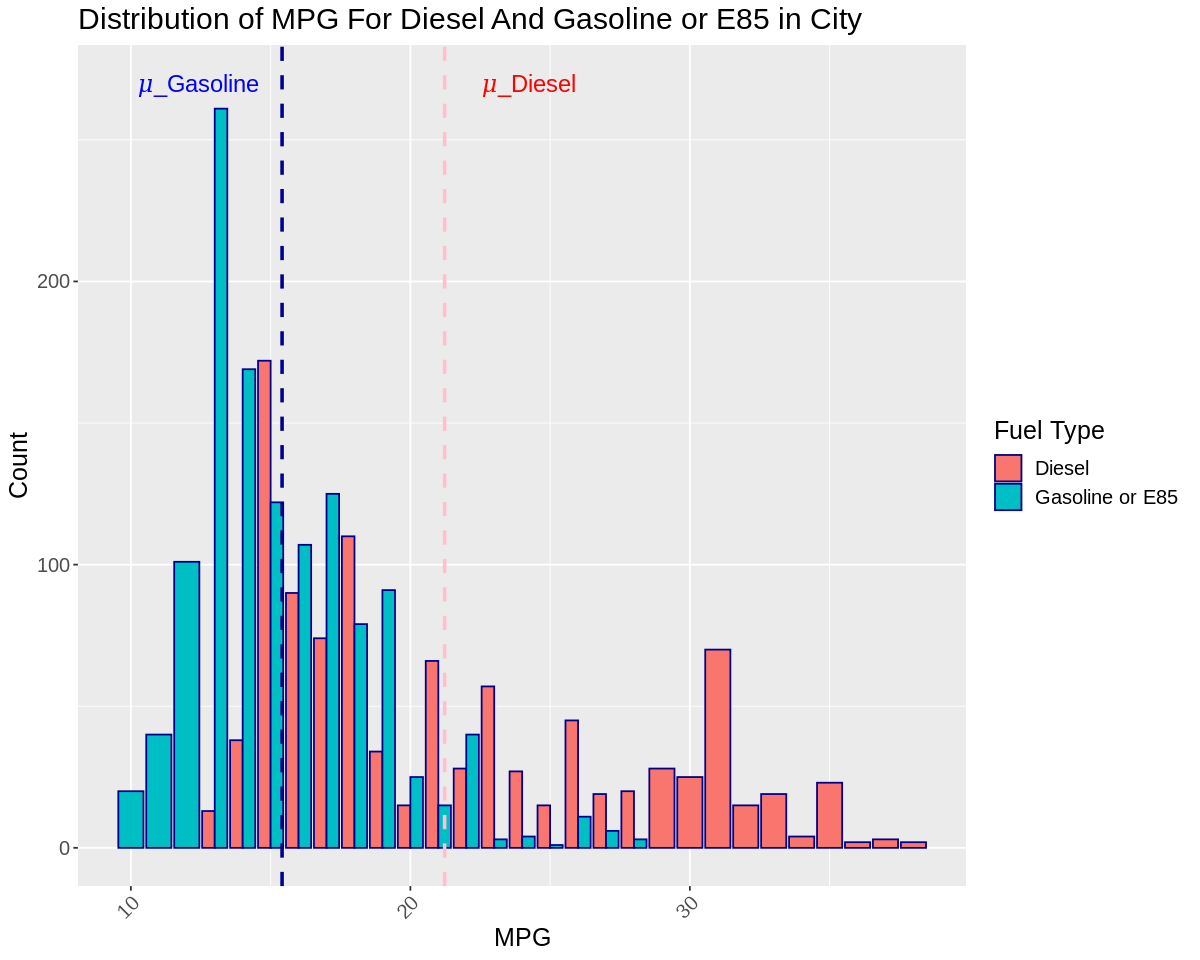

In [110]:
options(repr.plot.width=10, repr.plot.height=8)

City_Histogram <- tidy_data %>%
     select(Fuel_Type, City_MPG) %>%
     ggplot() +
     geom_histogram(aes(x= City_MPG ,fill = Fuel_Type),position="dodge", stat="count",color="darkblue")+
     geom_vline(aes(xintercept = diesel_mean), color = "pink", linetype = 2, lwd = 1)+
    annotate("text", x = diesel_mean+3, y = 270, label = "𝜇_Diesel", color="red", size=5)+
     geom_vline(aes(xintercept = gasoline_mean), color = "darkblue", linetype = 2, lwd = 1)+
    annotate("text", x = gasoline_mean-3, y = 270, label = "𝜇_Gasoline", color="blue", size=5)+
     ggtitle("Distribution of MPG For Diesel And Gasoline or E85 in City") + 
     xlab("MPG") +
     ylab("Count") + 
    theme(text = element_text(size = 15)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    guides(fill=guide_legend(title="Fuel Type"))
    
City_Histogram

Plot I: *Histogram of the Distribution of MPG For Diesel And Gasoline or E85 In City*

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


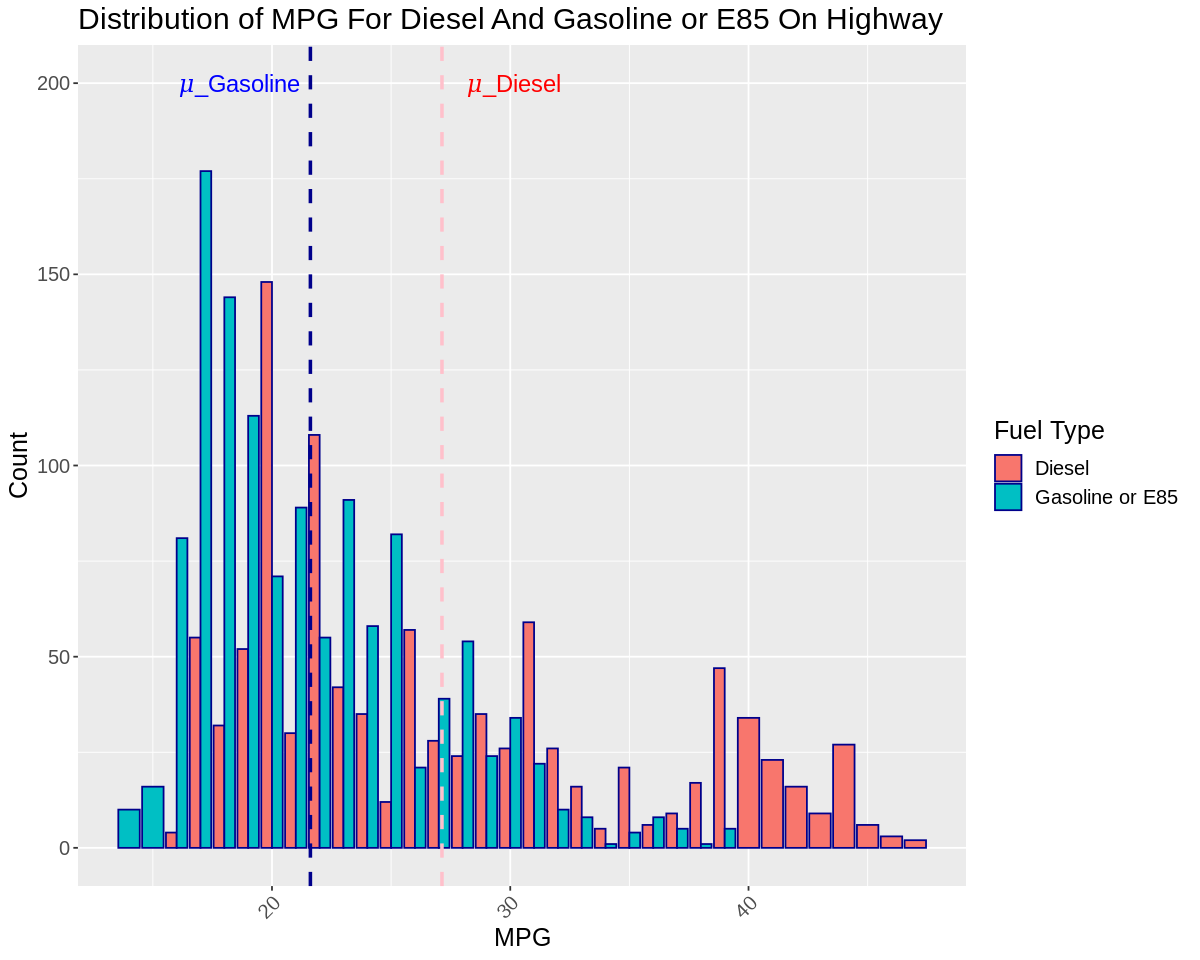

In [118]:
#$df$"Fuel Type 1
Highway_Histogram <- tidy_data %>%
     select(Fuel_Type, Highway_MPG) %>%
     ggplot() +
     geom_histogram(aes(x= Highway_MPG ,fill = Fuel_Type),position="dodge", stat="count",color="darkblue")+
     ggtitle("Distribution of MPG For Diesel And Gasoline or E85 On Highway ") + 
     xlab("MPG") +
     ylab("Count") + 
    theme(text = element_text(size = 15)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    geom_vline(aes(xintercept = diesel_H_mean), color = "pink", linetype = 2, lwd = 1)+
    annotate("text", x = diesel_H_mean+3, y = 200, label = "𝜇_Diesel", color="red", size=5)+

     geom_vline(aes(xintercept = gasoline_H_mean), color = "darkblue", linetype = 2, lwd = 1)+
    annotate("text", x = gasoline_H_mean-3, y = 200, label = "𝜇_Gasoline", color="blue", size=5)+
guides(fill=guide_legend(title="Fuel Type"))
Highway_Histogram

Plot II: *Histogram of the Distribution of MPG For Diesel And Gasoline or E85 On Highway*

In [112]:
# Price_Histogram <- tidy_data %>%
#      select(Fuel_Type, Price) %>%
#      ggplot() +
#      geom_histogram(aes(x= Price ,fill = Fuel_Type) ,position="dodge", stat="count",color="darkblue")+
#      ggtitle("Distribution of Annual Fuel Cost For Diesel And Gasoline or E85 ") + 
#      labs(x = "Annual Cost in USD", y = "Count")+
#      theme(text = element_text(size = 15)) +
#      theme(axis.text.x = element_text(angle = 45, hjust = 1))+ 
#      guides(fill=guide_legend(title="Fuel Type"))
# Price_Histogram

In [113]:
# Plot III: *Histogram of the Distribution of Fuel Cost For Diesel And Gasoline or E85* -->

From these histograms, we can see that the distribution of MPG for the diesel and gasoline fuel types are not uniformly distributed; they are unimodal but the distribution is skewed to the right. This is logical as there will be more cars that are less efficient for both fuel types (car manufacturers might focus on lowering the price of the car instead of focusing on efficiency). However, the distribution for the diesel fuel type is much more spread out for both the cases of Highway MPG and City MPG. This observation is captured by the difference in their IQR values. <br>

Diesel: (City: 10, Highway: 12) <br>
Gasoline: (City: 4, Highway: 7)

## 3. Methods

### 3.1 Need for further investigation

Back when we compared the medians of the dataset, we found that the mean of diesel (City: 21, Highway: 27) is higher than the mean of gasoline’s (City: 15, Highway: 21) in both the city and highway MPG. This would suggest that diesel-based cars are more efficient than gasoline-based cars due to a higher MPG. 

However, the dataset that we are working is only a sample of all the diesel and gasoline cars available. Hence, drawing a conclusion here isn’t justified. To explore the dataset further, we will be performing two sample z-test hypothesis tests using bootstrap sampling in order to get a more robust conclusion. 

### 3.2 Assumptions and Hypotheses

An assumption for our hypothesis tests are that the dataset was sampled randomly and each example was independent to one another. This is a fair assumption, as the cars are from different car manufacturers and were produced in different years. As discussed before, our dataset is asymmetrically distributed, which means we would need to have a huge sample size to work with to have the law of big numbers kick in and utilize a Normal Distribution rather than a t-Distribution. This isn't a problem either as our dataset has 1000+ examples for both the diesel and gasoline fuel types. Hence, the approach that we will be taking is justified.

We will be performing 2 "two sample z-tests"; the first for the difference in City MPG and the second for the difference in Highway MPG.  In each case, we will test be testing the following null and alternative hypotheses:

$H_0$: The difference in mean City MPG between Diesel and Gasoline are the same, $\mu_{Diesel, City} - \mu_{Gasoline, City} = 0$. <br>
$\mu_{Diesel, City} = \mu_{Gasoline, City}$. <br>
$H_A$: The difference in mean City MPG between Diesel and Gasoline are different, 
$\mu_{Diesel, City} - \mu_{Gasoline, City} \neq 0$ <br>
$\mu_{Diesel, City} \neq \mu_{Gasoline, City}$. <br>

$H_0$: The difference in mean Highway MPG between Diesel and Gasoline are the same, $\mu_{Diesel, Highway} - \mu_{Gasoline, Highway} = 0$. <br>
$\mu_{Diesel, Highway} = \mu_{Gasoline, Highway}$. <br>
$H_A$: The difference in mean Highway MPG between Diesel and Gasoline are different, $\mu_{Diesel, Highway} -\mu_{Gasoline, Highway} \neq 0$. <br>
$\mu_{Diesel, Highway} \neq \mu_{Gasoline, Highway}$. <br>

### 3.3 Expectations and Further Studies

We expect to find a relation between the factors we have chosen for fuel type and fuel efficiency. From the plot visualization above, we expect diesel fuel has better efficiency on both city roads and highways. 

Knowing these factors can help a vehicle customer decide the type of car to save money on fuel spending. The report also gives the customer an option to compare the results with their driving habits, whether they drive more city roads or highways (if a car is more efficient on a highway than in the city and vice versa). This result could lead to future questions regarding the generality of the studies as we are only comparing cars from a specific time range and a selected number of gasoline and diesel cars brands. The project can be repeated with a dataset based on more recent cars and a wider variety of car brands.

## 4. Hypothesis Testing

### 4.1 Hypothesis Testing for City MPG With 90% Confidence Interval

In [139]:
xc_data <- tidy_data %>% filter(Fuel_Type == "Diesel") %>% pull(as.numeric(City_MPG))
yc_data <- tidy_data %>% filter(Fuel_Type == "Gasoline or E85") %>% pull(as.numeric(City_MPG))
city_test <- tidy(
            t.test(x = xc_data, 
                   y = yc_data, 
                   alternative = "two.sided", conf.level = 0.90))
city_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5.81619,21.22584,15.40965,26.98404,3.997089e-130,1439.726,5.461427,6.170953,Welch Two Sample t-test,two.sided


### 4.1.1 Hypothesis Testing for Simulating from the null distribution

In [144]:
# Simulating from the null distribution by generate 1000 samples from the null distribution.
null_distribution_city <- tidy_data %>% 
    select(Fuel_Type, City_MPG) %>%
    specify(formula = City_MPG ~ Fuel_Type) %>% 
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute") %>% 
    calculate(stat = "diff in means", order = c( "Diesel", "Gasoline or E85"))
head(null_distribution_city)

replicate,stat
<int>,<dbl>
1,-0.17801958
2,-0.22131210
3,-0.10045383
4,0.06910852
5,-0.11308081
6,-0.10406154


In [169]:
city_result<-tidy(t.test(x = null_distribution_city$stat, alternative = "two.sided", conf.level = 0.90))
city_result
city_test

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.002014145,0.2712725,0.7862375,999,-0.0102099,0.01423819,One Sample t-test,two.sided


estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5.81619,21.22584,15.40965,26.98404,3.997089e-130,1439.726,5.461427,6.170953,Welch Two Sample t-test,two.sided


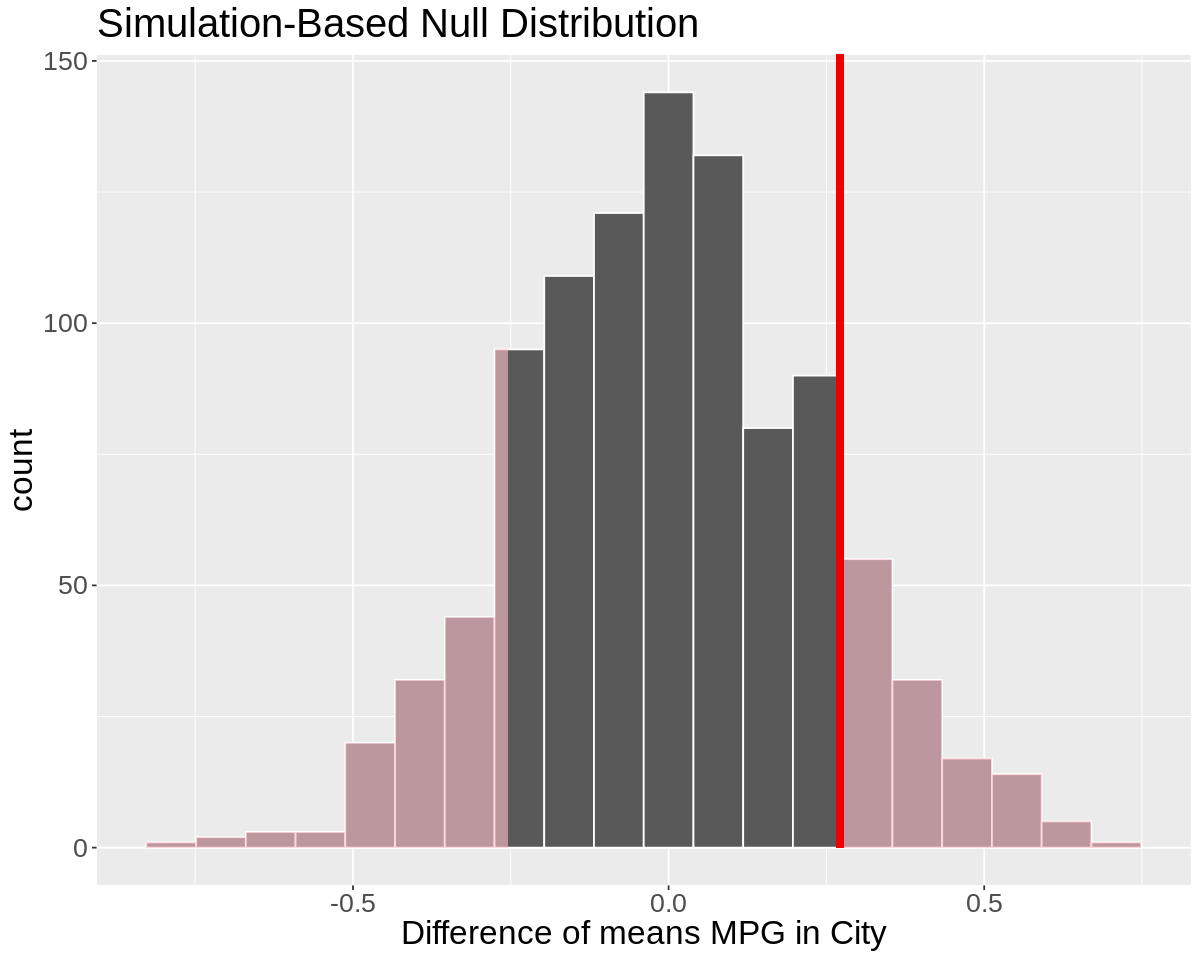

In [168]:
#  plot the result of the hypothesis test above.
city_result_plot <- 
   null_distribution_city %>%
   visualize(bins = 20) + 
   shade_p_value(obs_stat = city_result$statistic, direction = "two_sided")+
   xlab("Difference of means MPG in City") + 
   theme(text = element_text(size=20))

city_result_plot

### 4.2 Hypothesis Testing for Highway MPG With 90% Confidence Interval

In [140]:
xh_data <- tidy_data %>% filter(Fuel_Type == "Diesel") %>% pull(as.numeric(Highway_MPG))
yh_data <- tidy_data %>% filter(Fuel_Type == "Gasoline or E85") %>% pull(as.numeric(Highway_MPG))
hway_test <- tidy(
            t.test(x = xh_data, 
                   y = yh_data, 
                   alternative = "two.sided", conf.level = 0.90))
hway_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5.522511,27.13412,21.61161,19.08213,2.834465e-73,1593.575,5.046202,5.998821,Welch Two Sample t-test,two.sided


In [125]:
# Simulating from the null distribution by generate 1000 samples from the null distribution.
null_distribution_highway <- tidy_data %>% 
    select(Fuel_Type, Highway_MPG) %>%
    specify(formula = Highway_MPG ~ Fuel_Type) %>% 
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute") %>% 
    calculate(stat = "diff in means", order = c( "Diesel", "Gasoline or E85"))
head(null_distribution_highway)

# "Diesel", "Gasoline or E85"

replicate,stat
<int>,<dbl>
1,0.07847776
2,0.13800497
3,0.28952877
4,0.31839045
5,0.01534285
6,-0.39954375


In [126]:
obs_diff_means <- tidy_data %>% 
    select(Fuel_Type, Highway_MPG) %>%
    specify(formula = Highway_MPG ~ Fuel_Type) %>% 
    calculate(stat = "diff in means", order = c("Diesel", "Gasoline or E85"))
obs_diff_means

stat
<dbl>
5.522511


### 4.3 Hypothesis Testing for Highway MPG

ERROR: Error in check_type(x, is.data.frame): argument "x" is missing, with no default


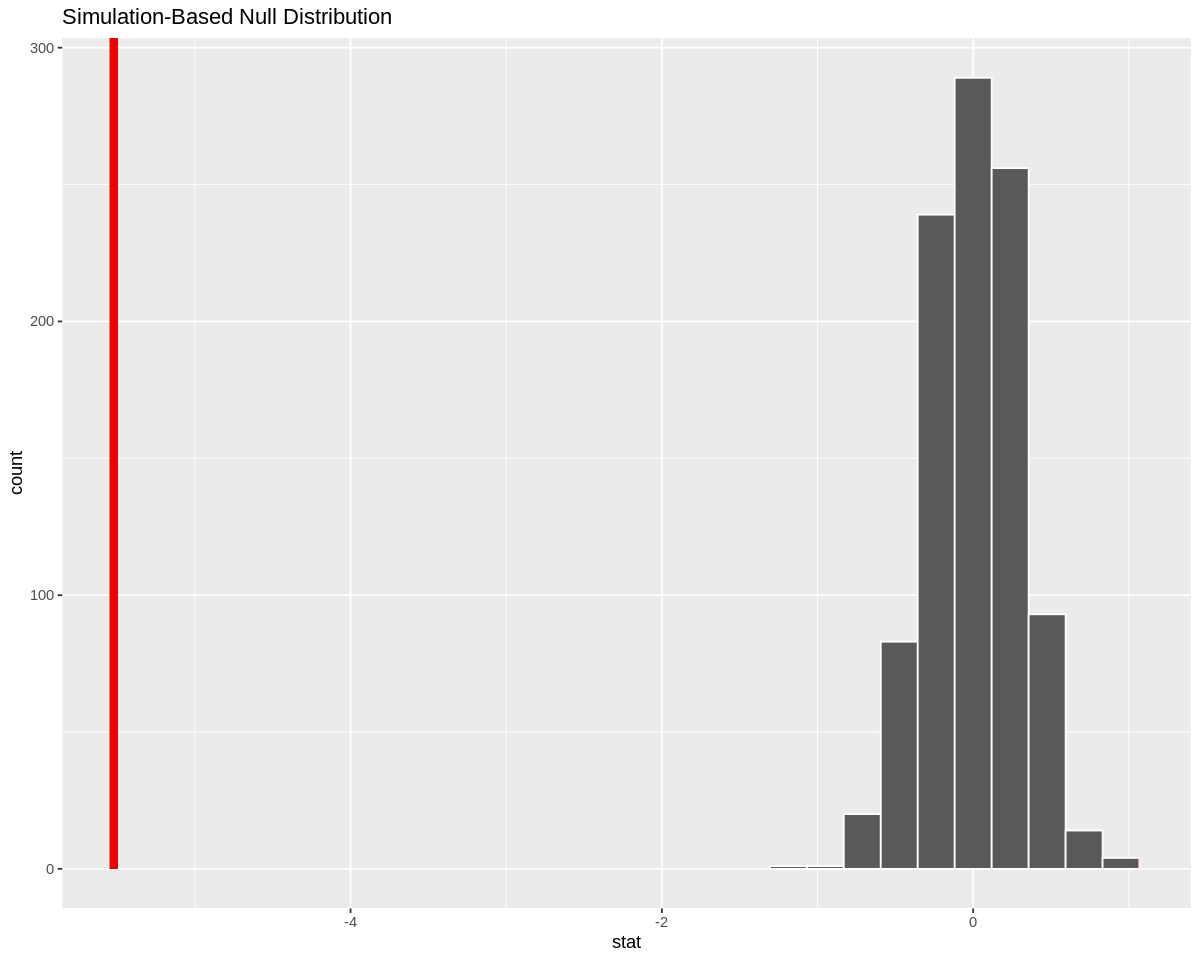

In [119]:
p_value_visualization <- visualize(null_distribution_highway, bins = 10) + 
  shade_p_value(obs_stat = obs_diff_means, direction = "both")
p_value_visualization

#Getting P-value
p_value <- visualize(null_distribution_highway, bins = 10) + 
get_p_value(obs_stat = obs_diff_means, direction = "both")

## 5. Confidence Intervals

### 5.1 Confidence Interval for City MPG

### 5.2 Confidence Interval for Highway MPG

## 6. References 
Baures, L. (2019, July 16). Pickup Trucks: Gas vs Diesel. Trusted Auto Professionals. https://tap.fremontmotors.com/pickup-trucks-gas-vs-diesel/

Chevrolet, S. (2021, March 10). What Is the Difference Between Diesel and Gas? Sweeney	Chevrolet. https://www.sweeneychevrolet.com/blog/what-is-the-difference-between-diesel-and-gas/

Gas vs. Diesel Engines: What’s the Difference? (2021). UTI Corporate. https://www.uti.edu/blog/diesel/gas-vs-diesel-engines